In [1]:
import random

In [2]:
def quick_sort(A):
    if len(A) <=1: return A

    pivot = A[0]
    left = []
    center = []
    right = []

    for i in range(len(A)):
        if A[i] < pivot:
            left.append(A[i])
        elif A[i] == pivot:
            center.append(A[i])
        else:
            right.append(A[i])
    
    left = quick_sort(left)
    right = quick_sort(right)

    return left + center + right

In [3]:
def double_pivot_quick_sort(A):
    '''
    Bad implementation - 0 speedup compared to simple quick sort!
    '''
    # Taking care of zero and one element list:
    if len(A) <= 1:
        return A
    # taking care of two element list: - swap if not in order
    if len(A) <=2: 
        if A[0] > A[1]:
            A[0], A[1] = A[1], A[0]
        return A

    # pivot_1 < pivot_2
    i=1
    while A[0] == A[i]: # last element to len(A)-1 -> len(A)-1 == i
        if len(A) == (i+1):
            return A # all elements in A are the same
        i += 1

    if A[0] > A[i]:
        pivot_1 = A[i]
        pivot_2 = A[0]
    else:
        pivot_1 = A[0]
        pivot_2 = A[i]

    left = []
    equal_pivot_1 = []
    center = []
    equal_pivot_2 = []
    right = []

    for i in range(len(A)):
        if A[i] < pivot_1:
            left.append(A[i])
        elif A[i] == pivot_1:
            equal_pivot_1.append(A[i])
        elif A[i] < pivot_2:
            center.append(A[i])
        elif A[i] == pivot_2:
            equal_pivot_2.append(A[i])
        else:
            right.append(A[i])
    
    left = double_pivot_quick_sort(left)
    center = double_pivot_quick_sort(center)
    right = double_pivot_quick_sort(right)

    return left + equal_pivot_1 + center + equal_pivot_2 + right

In [4]:
def buble_sort(A):
    for j in range(len(A)-1):
        for i in range(len(A)-j-1):
            if A[i] > A[i+1]:
                A[i], A[i+1] = A[i+1], A[i]
    return A

In [5]:
def validate_sorted(A):
    for i in range(len(A)-1):
        if A[i] > A[i+1]: 
            print(A[i], A[i+1])
            return False
    return True

In [6]:
n = 1000
A = [random.randint(1,n*n) for _ in range(n)]
result = quick_sort(A)
print("is sorted:", validate_sorted(result))

is sorted: True


In [7]:
n = 10
A = [random.randint(1,n*n) for _ in range(n)]
result = double_pivot_quick_sort(A)
print("is sorted:", validate_sorted(result))

is sorted: True


In [8]:
# test stability - searching for edge cases e.g. three or more of the same values in array [42, 42, 42]
for i in range(10000):
    n = 100
    A = [random.randint(1,n*n) for _ in range(n)]
    result = double_pivot_quick_sort(A)
    if not validate_sorted(result):
        print("Not sorted!")
        break

In [9]:
n = 2**10
A = [random.randint(1,n*n) for _ in range(n)]
result = buble_sort(A)
print("is sorted:", validate_sorted(result))

is sorted: True


In [10]:
import time

In [19]:
n = 20
#sizes = [2**i for i in range(5,n)]
sizes =[1_000_000, 5_000_000, 10_000_000]
time_sorting = {
    "sizes" : [],
    "quick_sort" : [],
    "buble_sort" : [],
    "double_pivot_quick_sort" : []
}

time_sorting["sizes"] = sizes
for size in sizes:
    A = [random.randint(1,size*size) for _ in range(size)]
    B = A.copy()
    C = A.copy()
    start = time.time()
    result = quick_sort(A)
    end = time.time()
    if validate_sorted(result) == False: break
    time_quick_sort = end - start

    '''start = time.time()
    result = buble_sort(B)
    end = time.time()
    if validate_sorted(result) == False: break
    time_buble_sort = end - start'''

    start = time.time()
    result = double_pivot_quick_sort(C)
    end = time.time()
    if validate_sorted(result) == False: break
    time_double_pivot_quick_sort = end - start

    time_sorting["quick_sort"].append(time_quick_sort)
    #time_sorting["buble_sort"].append(time_buble_sort)
    time_sorting["double_pivot_quick_sort"].append(time_double_pivot_quick_sort)



In [17]:
print(time_sorting["sizes"])

[32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288]


<function matplotlib.pyplot.show(close=None, block=None)>

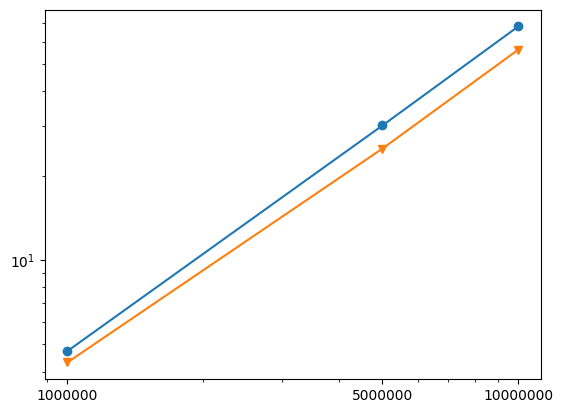

In [20]:
import matplotlib.pyplot as plt

#plt.plot(time_sorting["sizes"], time_sorting["buble_sort"], marker = 'x')
plt.plot(time_sorting["sizes"], time_sorting["quick_sort"], marker = 'o')
plt.plot(time_sorting["sizes"], time_sorting["double_pivot_quick_sort"], marker = 'v')
plt.xscale('log')
plt.yscale('log')
plt.xticks((time_sorting["sizes"]), (time_sorting["sizes"]))

plt.show